In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Data

In [3]:
personas = pd.read_csv('..\\..\\Datos\\experiments\\personas_cotizacion6.csv',encoding = "ISO-8859-1")
personas.head(2)


,Unnamed: 0,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,...,nro_proyectos,profesion,rut,sexo,tipo_cliente,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,0,True,False,True,False,True,True,True,False,True,...,2.0,Abogado,000.000.000-0,Femenino,Natural,0.0,1.0,1.0,0.0,0.0
1,1,True,False,True,False,False,True,True,False,False,...,1.0,sin informacion,1.462.558-5,Masculino,Natural,0.0,0.0,0.0,1.0,0.0


In [4]:
print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(6184, 36)
(6184, 32)
(6184,)
(6184, 187)


In [5]:
# Check the data set
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 187)
Personas que hicieron Negocio:  (1101,)
Personas que no Hicieorn Negocio:  (5083,)


# 2 Unsupervised Learning

## 2.1 Dim Reduction

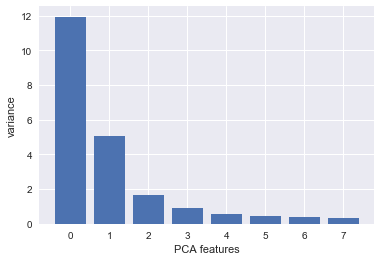

In [6]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(personas)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

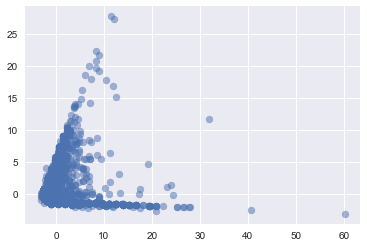

In [7]:
pca = PCA(n_components = 2)
pca.fit(personas)
transformed = pca.transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

## 2.2 KMeans

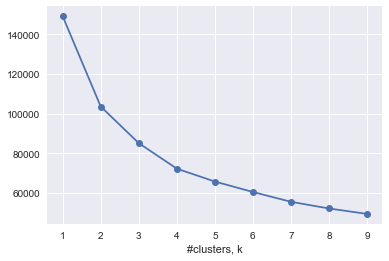

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
scaler = StandardScaler()

# for k in ks:
#     model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
#     pipeline.fit(personas)
#     inertias.append(pipeline.named_steps['kmeans'].inertia_)
 
for k in ks:
    model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
    model.fit(personas)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

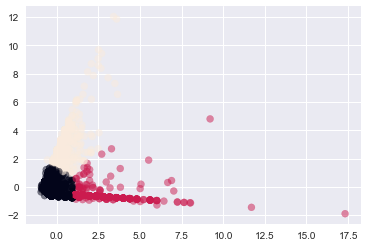

In [9]:
#Clustering

scaler = StandardScaler()

km = KMeans(n_clusters=3, max_iter=300, random_state=None)
km.fit(personas)

# pipeline = make_pipeline(scaler,km)
# pipeline.fit(personas)

# clusters = km.fit_predict(personas)
# personas['cluster'] = pipeline.fit_predict(personas)
personas['km_cluster'] = km.fit_predict(personas)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(personas)

xs = pca.fit_transform(personas)[:, 0]
ys = pca.fit_transform(personas)[:, 1]

plt.scatter(xs, ys, c=personas['km_cluster'],alpha=0.5)
plt.show()


In [10]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['km_cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0          4524    582
1           207    390
2           352    129


In [12]:
personas.groupby('km_cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,is_recontacto,...,profesion_Técnico en Enfermería,profesion_Técnico en Logística,profesion_Vendedor,profesion_Visitador Médico,profesion_sin informacion,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.994908,0.828829,0.992362,0.174892,0.103799,0.999608,0.999608,0.292205,0.334313,0.150803,...,0.000392,0.000000,0.000588,0.000392,0.665687,0.407168,0.569134,0.023698,0.005092,0.994908
1,1.000000,0.951424,1.000000,0.495812,0.422111,1.000000,1.000000,0.552764,0.564489,0.668342,...,0.001675,0.001675,0.001675,0.000000,0.435511,0.324958,0.670017,0.005025,0.000000,1.000000
2,0.997921,0.829522,0.991684,0.276507,0.185031,1.000000,1.000000,0.380457,0.430353,0.182952,...,0.002079,0.000000,0.002079,0.000000,0.569647,0.401247,0.586279,0.012474,0.002079,0.997921


## 2.2 TSNE

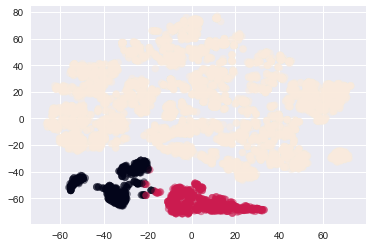

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, max_iter=300, random_state=None)
personas['tsne_cluster'] = km.fit_predict(personas)

from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=personas['tsne_cluster'],alpha=0.5)
plt.show()

In [17]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['tsne_cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0           352    129
1           207    390
2          4524    582


In [18]:
personas.groupby('tsne_cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,is_recontacto,...,profesion_Técnico en Logística,profesion_Vendedor,profesion_Visitador Médico,profesion_sin informacion,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural,km_cluster
tsne_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.997921,0.829522,0.991684,0.276507,0.185031,1.000000,1.000000,0.380457,0.430353,0.182952,...,0.000000,0.002079,0.000000,0.569647,0.401247,0.586279,0.012474,0.002079,0.997921,2
1,1.000000,0.951424,1.000000,0.495812,0.422111,1.000000,1.000000,0.552764,0.564489,0.668342,...,0.001675,0.001675,0.000000,0.435511,0.324958,0.670017,0.005025,0.000000,1.000000,1
2,0.994908,0.828829,0.992362,0.174892,0.103799,0.999608,0.999608,0.292205,0.334313,0.150803,...,0.000000,0.000588,0.000392,0.665687,0.407168,0.569134,0.023698,0.005092,0.994908,0
